In [2]:
import tensorflow as tf
print("Using TensorFlow Version %s" %tf.__version__)

Using TensorFlow Version 1.14.0


In [3]:
import numpy as np

In [4]:
import random

In [17]:
#prepare data
#f(x)= x**3 + x**2 - x - 1
X = tf.placeholder(tf.float32)
Y = X**3+X**2-X-1

train_x = list(np.arange(-100,100,0.1))
random.shuffle(train_x)

with tf.Session() as sess:
    #add noise
    train_y = sess.run(Y, {X:train_x})+np.random.normal(0,0.09)
    #print(train_x,train_y)

In [18]:
#some training args
nsteps = 300
#batch_size = 4
show_step = True
lr = 0.1

#num of units in hidden layer
h1 = 100
h2 = 200

In [19]:
def fc_layer(x, n_units, name):
    input_dim = x.get_shape()[1]
    #print out hidden layer shape
    print('input shape '+name+'= '+str(input_dim))
    w = tf.get_variable("W"+name, dtype=tf.float32, shape=[input_dim, n_units], initializer=tf.truncated_normal_initializer(stddev=0.01))
    b = tf.get_variable('b'+name, dtype=tf.float32, initializer=tf.constant(0., shape=[n_units], dtype=tf.float32))
    return tf.matmul(x,w)+b

    

In [20]:
def nnet(x,name):
    layer1 = fc_layer(x, h1, 'fc1'+str(name))
    layer1 = tf.nn.relu(layer1)
    layer2 = fc_layer(layer1, h2, 'fc2'+str(name))
    layer2 = tf.nn.relu(layer2)
    layerout = fc_layer(layer2, 1, 'fco'+str(name))
    return layerout

In [21]:
#input tensor
X = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='X')
y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='y')

#construct model
logits = nnet(X,'a')


input shape fc1a= 1
input shape fc2a= 100
input shape fcoa= 200


In [22]:
loss_opt = tf.reduce_mean(tf.square(y-logits))
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
train = optimizer.minimize(loss_opt)

correct_predict = tf.equal(tf.argmax(logits,1), tf.argmax(y,1))

accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))

In [23]:
def cut_batch(x,y,size,index):
    sub_x = []
    sub_y = []
    for i in range(size):
        cur = size*index+i
        if(cur < len(x)):
            sub_x.append(x[size*index+i])
            sub_y.append(y[size*index+i])
        else: break
        
    return sub_x, sub_y

In [24]:
import matplotlib.pyplot as plt

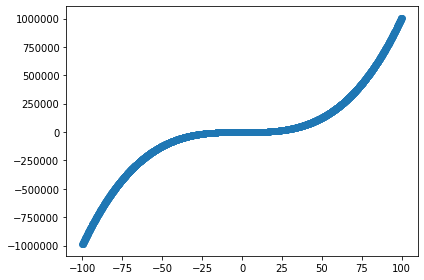

In [25]:
fig,ax = plt.subplots()
fig.set_tight_layout(True)
ax.scatter(train_x,train_y)

In [26]:
#train data input format config
train_x = np.array(train_x,float)[:,np.newaxis]
train_y = np.array(train_y,float)[:,np.newaxis]

In [27]:
predict_a = []

    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(nsteps):
        '''
        batch_x, batch_y = cut_batch(train_x, train_y, batch_size, i)
        batch_x = np.array(batch_x,float)[:,np.newaxis]
        for j in range(len(batch_y)):
            #add noise
            batch_y[j]+=np.random.normal(0,0.09)
        batch_y = np.array(batch_y,float)[:,np.newaxis]
        '''
        
        
        _,loss,acc = sess.run([train,loss_opt,accuracy],{X:train_x, y:train_y})
        
        if(show_step):
            print("Step " + str(i+1) + " , Loss= " + str(loss))
        
    print("Train Finished")
    
    predict_a = sess.run(logits,{X:train_x})
    

Step 1 , Loss= 142827630000.0
Step 2 , Loss= 142823930000.0
Step 3 , Loss= 142621020000.0
Step 4 , Loss= 142184870000.0
Step 5 , Loss= 141190000000.0
Step 6 , Loss= 139346210000.0
Step 7 , Loss= 136330576000.0
Step 8 , Loss= 131751750000.0
Step 9 , Loss= 125233775000.0
Step 10 , Loss= 116451360000.0
Step 11 , Loss= 105186880000.0
Step 12 , Loss= 91437860000.0
Step 13 , Loss= 75522380000.0
Step 14 , Loss= 58372760000.0
Step 15 , Loss= 41758830000.0
Step 16 , Loss= 28686225000.0
Step 17 , Loss= 23536500000.0
Step 18 , Loss= 29696500000.0
Step 19 , Loss= 41760743000.0
Step 20 , Loss= 47509980000.0
Step 21 , Loss= 44068286000.0
Step 22 , Loss= 36051180000.0
Step 23 , Loss= 28484330000.0
Step 24 , Loss= 24155430000.0
Step 25 , Loss= 23455355000.0
Step 26 , Loss= 25225667000.0
Step 27 , Loss= 27896670000.0
Step 28 , Loss= 30228922000.0
Step 29 , Loss= 31537471000.0
Step 30 , Loss= 31609874000.0
Step 31 , Loss= 30561374000.0
Step 32 , Loss= 28742990000.0
Step 33 , Loss= 26632047000.0
Step 34 

hidden layer 1: 100
hidden layer 2: 200


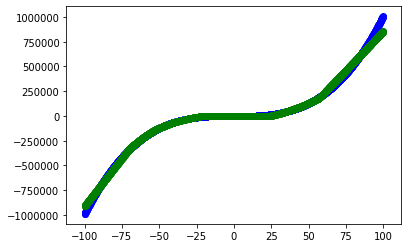

In [28]:
#plot result
print("hidden layer 1: "+str(h1)+"\nhidden layer 2: "+str(h2))
plt.scatter(train_x,train_y,color='blue')
plt.scatter(train_x,predict_a, color='green')
plt.show()

In [29]:
#num of units in hidden layer
h1 = 45
h2 = 100

#construct model
logits = nnet(X,'b')

input shape fc1b= 1
input shape fc2b= 45
input shape fcob= 100


In [30]:
loss_opt = tf.reduce_mean(tf.square(y-logits))
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
train = optimizer.minimize(loss_opt)

correct_predict = tf.equal(tf.argmax(logits,1), tf.argmax(y,1))

accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))

In [31]:
predict_b = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(nsteps):
        '''
        batch_x, batch_y = cut_batch(train_x, train_y, batch_size, i)
        batch_x = np.array(batch_x,float)[:,np.newaxis]
        for j in range(len(batch_y)):
            #add noise
            batch_y[j]+=np.random.normal(0,0.09)
        batch_y = np.array(batch_y,float)[:,np.newaxis]
        '''
        
        
        _,loss,acc = sess.run([train,loss_opt,accuracy],{X:train_x, y:train_y})
        
        if(show_step):
            print("Step " + str(i+1) + " , Loss= " + str(loss))
        
    print("Train Finished")
    
    predict_b = sess.run(logits,{X:train_x})
    

Step 1 , Loss= 142827630000.0
Step 2 , Loss= 142825360000.0
Step 3 , Loss= 142784950000.0
Step 4 , Loss= 142694990000.0
Step 5 , Loss= 142494250000.0
Step 6 , Loss= 142124530000.0
Step 7 , Loss= 141522500000.0
Step 8 , Loss= 140614780000.0
Step 9 , Loss= 139320130000.0
Step 10 , Loss= 137550640000.0
Step 11 , Loss= 135213250000.0
Step 12 , Loss= 132212290000.0
Step 13 , Loss= 128452600000.0
Step 14 , Loss= 123844150000.0
Step 15 , Loss= 118308370000.0
Step 16 , Loss= 111786250000.0
Step 17 , Loss= 104296540000.0
Step 18 , Loss= 95729110000.0
Step 19 , Loss= 86252270000.0
Step 20 , Loss= 76029860000.0
Step 21 , Loss= 65319223000.0
Step 22 , Loss= 54546500000.0
Step 23 , Loss= 44267225000.0
Step 24 , Loss= 35245912000.0
Step 25 , Loss= 28380875000.0
Step 26 , Loss= 24775645000.0
Step 27 , Loss= 24964157000.0
Step 28 , Loss= 28460368000.0
Step 29 , Loss= 33412157000.0
Step 30 , Loss= 37417878000.0
Step 31 , Loss= 38859567000.0
Step 32 , Loss= 37563646000.0
Step 33 , Loss= 34436710000.0
St

Step 298 , Loss= 10914311000.0
Step 299 , Loss= 10731670000.0
Step 300 , Loss= 10552419000.0
Train Finished


hidden layer 1: 45
hidden layer 2: 100


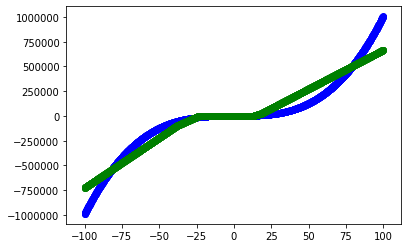

In [32]:
#plot result
print("hidden layer 1: "+str(h1)+"\nhidden layer 2: "+str(h2))
plt.scatter(train_x,train_y,color='blue')
plt.scatter(train_x,predict_b, color='green')
plt.show()

In [33]:
#num of units in hidden layer
h1 = 10
h2 = 30

#construct model
logits = nnet(X,'c')

input shape fc1c= 1
input shape fc2c= 10
input shape fcoc= 30


In [34]:
loss_opt = tf.reduce_mean(tf.square(y-logits))
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
train = optimizer.minimize(loss_opt)

correct_predict = tf.equal(tf.argmax(logits,1), tf.argmax(y,1))

accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))

In [35]:
predict_c = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(nsteps):
        '''
        batch_x, batch_y = cut_batch(train_x, train_y, batch_size, i)
        batch_x = np.array(batch_x,float)[:,np.newaxis]
        for j in range(len(batch_y)):
            #add noise
            batch_y[j]+=np.random.normal(0,0.09)
        batch_y = np.array(batch_y,float)[:,np.newaxis]
        '''
        
        
        _,loss,acc = sess.run([train,loss_opt,accuracy],{X:train_x, y:train_y})
        
        if(show_step):
            print("Step " + str(i+1) + " , Loss= " + str(loss))
        
    print("Train Finished")
    
    predict_c = sess.run(logits,{X:train_x})
    

Step 1 , Loss= 142827630000.0
Step 2 , Loss= 142827770000.0
Step 3 , Loss= 142826440000.0
Step 4 , Loss= 142822060000.0
Step 5 , Loss= 142811430000.0
Step 6 , Loss= 142790250000.0
Step 7 , Loss= 142753430000.0
Step 8 , Loss= 142695250000.0
Step 9 , Loss= 142609040000.0
Step 10 , Loss= 142487260000.0
Step 11 , Loss= 142321500000.0
Step 12 , Loss= 142102530000.0
Step 13 , Loss= 141820150000.0
Step 14 , Loss= 141463290000.0
Step 15 , Loss= 141019970000.0
Step 16 , Loss= 140477270000.0
Step 17 , Loss= 139821450000.0
Step 18 , Loss= 139037980000.0
Step 19 , Loss= 138116740000.0
Step 20 , Loss= 137026250000.0
Step 21 , Loss= 135765660000.0
Step 22 , Loss= 134313026000.0
Step 23 , Loss= 132669240000.0
Step 24 , Loss= 130763850000.0
Step 25 , Loss= 128634090000.0
Step 26 , Loss= 126246410000.0
Step 27 , Loss= 123586310000.0
Step 28 , Loss= 120640890000.0
Step 29 , Loss= 117399536000.0
Step 30 , Loss= 113854420000.0
Step 31 , Loss= 110001330000.0
Step 32 , Loss= 105840390000.0
Step 33 , Loss= 1

hidden layer 1: 10
hidden layer 2: 30


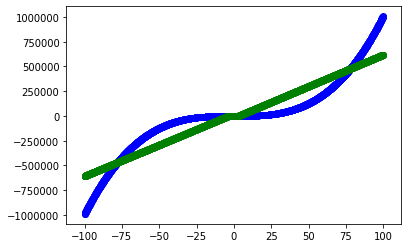

In [36]:
#plot result
print("hidden layer 1: "+str(h1)+"\nhidden layer 2: "+str(h2))
plt.scatter(train_x,train_y,color='blue')
plt.scatter(train_x,predict_c, color='green')
plt.show()

HW4 Part 1 comparsion
hidden layer 1: 10
hidden layer 2: 30
green

hidden layer 1: 45
hidden layer 2: 100
yellow

hidden layer 1: 100
hidden layer 2: 200
red



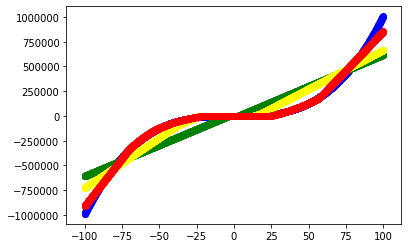

In [37]:
print("HW4 Part 1 comparsion")
print("hidden layer 1: 10\nhidden layer 2: 30\ngreen\n")
print("hidden layer 1: 45\nhidden layer 2: 100\nyellow\n")
print("hidden layer 1: 100\nhidden layer 2: 200\nred\n")
plt.scatter(train_x,train_y,color='blue')
plt.scatter(train_x,predict_c,color='green')
plt.scatter(train_x,predict_b,color='yellow')
plt.scatter(train_x,predict_a,color='red')

In [38]:
from sklearn import datasets
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.contrib.layers import fully_connected
%matplotlib inline
print("Using TensorFlow Version %s" %tf.__version__)
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)  
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))  

Using TensorFlow Version 1.14.0


In [39]:
np.random.seed(0)
X, Y = datasets.make_circles(n_samples=500, factor=0.1,
noise=0.1)

# Split into test and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.25,
                                                    random_state=73)

In [7]:
# Define network dimensions
n_inputs = X_train.shape[0]
n_input_dim = X_train.shape[1]
# Layer size
n_hidden = 4 # Number of hidden nodes
n_output = 1 # Number of output nodes = for binary classifier

In [8]:
X_input = tf.placeholder(tf.float32, [None, n_input_dim], name='input')
y = tf.placeholder(tf.float32, [None, n_output], name='y')

In [9]:
initializer = tf.contrib.layers.xavier_initializer()
hidden1 = fully_connected(X_input, n_hidden, activation_fn=tf.nn.elu,
                         weights_initializer=initializer)
logits = fully_connected(hidden1, n_output, activation_fn=tf.nn.sigmoid,
                        weights_initializer=initializer)

In [13]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
cost = tf.reduce_mean(loss)
learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(learning_rate)
train_op = optimizer.minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


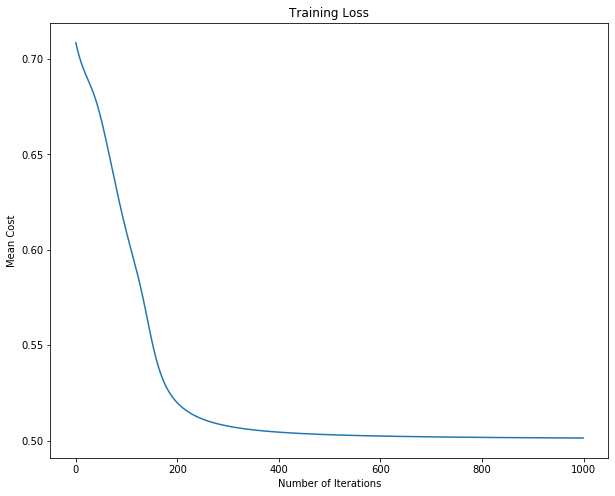

Test Accuracy 1.00


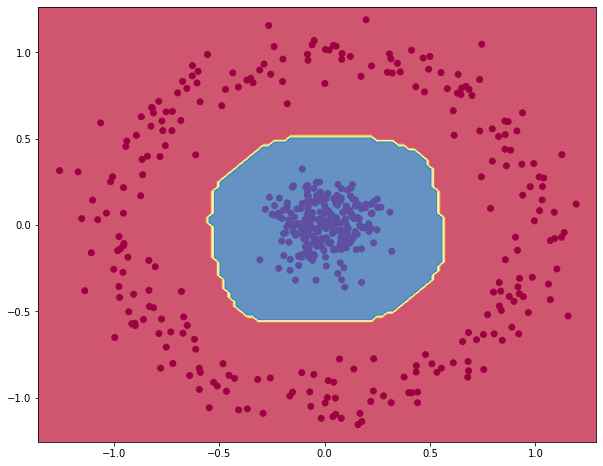

In [16]:
# Reshape labels to match placeholder
Y_train = Y_train.reshape(-1, 1)

# Define feed dicts
train_feed = {X_input: X_train,
              y: Y_train}
test_feed = {X_input: X_test}

# Initialize list to store cost results
iter_cost = []
iters = 1000

# Initialize global variables
init = tf.global_variables_initializer()
# Start session and run loop
with tf.Session() as sess:
    sess.run(init)
    
    # Run training loop
    for i in range(iters):
        _, cost_ = sess.run([train_op, cost],
                       feed_dict=train_feed)
        
        # Append the cost
        iter_cost.append(cost_)
        
    # Plot training loss
    plt.figure(figsize=(10,8))
    plt.plot(iter_cost)
    plt.title("Training Loss")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Mean Cost")
    plt.show()   

    # Make prediction
    y_prob = sess.run([logits],
                    feed_dict=test_feed)[0]
    
    # Replace probabilities with lables for comparison
    y_hat = np.where(y_prob<0.5,0,1)
    # Get prediction accuracy
    acc = np.sum(Y_test.reshape(-1,1)==y_hat) / len(Y_test)
    print("Test Accuracy %.2f" %acc)
    
    # Plot the decision boundary
    # Determine grid range in x and y directions
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    
    # Set grid spacing parameter
    spacing = min(x_max - x_min, y_max - y_min) / 100

    # Create grid
    XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                   np.arange(y_min, y_max, spacing))
    
    # Concatenate data to match input
    data = np.hstack((XX.ravel().reshape(-1,1), 
                      YY.ravel().reshape(-1,1)))

    # Pass data to predict method
    db_prob = sess.run([logits],
                      feed_dict={X_input: data})[0]
    clf = np.where(db_prob<0.5,0,1)
    
    Z = clf.reshape(XX.shape)

    plt.figure(figsize=(10,8))
    plt.contourf(XX, YY, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=Y, 
                cmap=plt.cm.Spectral)
    plt.show()